- 用接下来两个月的数据进行测试

In [1]:
import joblib
from utils import *
import numpy as np
from sklearn.metrics import r2_score
import pylab as plt
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
asin = 'B07FKN76ZS'

In [3]:
model = joblib.load('./model/' + asin + '.pkl')

In [4]:
date_pred = pd.DataFrame({'data_date': pd.date_range('2021-8-23', periods=83)})
date_pred
prediction = model.predict(create_feature(date_pred))

In [5]:
data = pd.read_csv('./data.csv', encoding='gbk')
data.data_date = pd.to_datetime(data.data_date)

In [6]:
last = data[data.asin == asin].sort_values(by='data_date').tail(1)

In [7]:
data1 = pd.read_csv('./cosori_2021-10-13.csv')

data1.data_date = pd.to_datetime(data1.data_date)

last.data_date.values[0]

target = data1[(data1.asin == asin) & (data1.data_date > last.data_date.values[0])
               ].sort_values(by='data_date').ordered_units.values

In [8]:
target.shape

(83,)

In [9]:
r2_score(target, prediction)

-2.8847812276337113

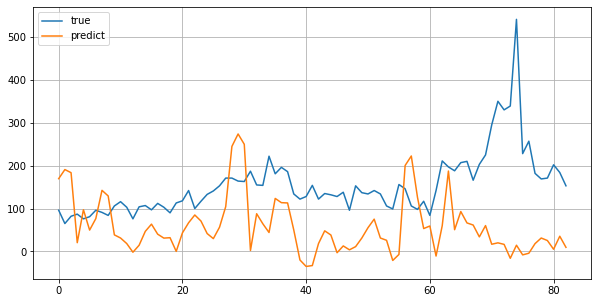

In [12]:
plt.figure(figsize=(10,5))
plt.plot(target, label='true')
plt.plot(prediction, label='predict')
plt.grid()
plt.legend()

In [ ]:
pd.DataFrame({'true': target, 'predict': prediction})